# **Finding Lane Lines on the Road** 

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


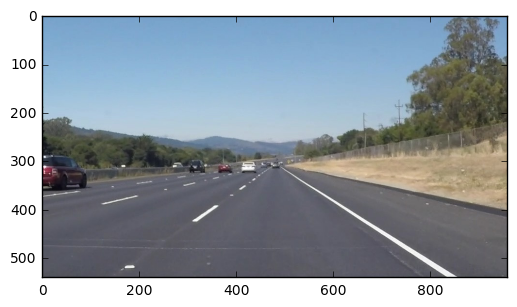

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

#### helper functions

draw_lines() function is challenging:
1. Classification of negative slope and positive slope. Here I used slope(m) to classify. Negative(Nve) is for one lane and Positve(Pve) for another lane. 
2. NaN or zero value

In [3]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
def draw_lines(img, lines, color=[150, 0,0], thickness=11):
## Right lane, negative slope
## Left lane, positive slope
    global x1_Pve
    global x2_Pve
    global x1_Nve
    global x2_Nve
    y_min = 0.6018518518518519*img.shape[0]
    y_max = img.shape[0]
    count_Nve=0.
    count_Pve=0.
    sum_x1_Nve =0.
    sum_x2_Nve =0. 
    sum_x1_Pve =0.
    sum_x2_Pve =0.
    for line in lines:
        for x1, y1, x2, y2 in line:
            if x2 != x1:
                m = (y2 - y1)/(x2 - x1)
                x_min=(y_min - y1)/m
                x_max=(y_max - y1)/m

                if -0.85 < m < -0.45:
                    count_Nve += 1
                    sum_x1_Nve += x_min + x1
                    sum_x2_Nve += x_max + x1
                    
                if 0.85 > m > 0.45:
                    count_Pve += 1
                    sum_x1_Pve += x_min + x1
                    sum_x2_Pve += x_max + x1

    if count_Nve != 0:
        x1_Nve = sum_x1_Nve/count_Nve
        x2_Nve = sum_x2_Nve/count_Nve
    cv2.line(img, (int(x1_Nve),int(y_min)), (int(x2_Nve),y_max), color, thickness)
    
    if count_Pve != 0:
        x1_Pve  = sum_x1_Pve/count_Pve
        x2_Pve  = sum_x2_Pve/count_Pve
    cv2.line(img, (int(x1_Pve),int(y_min)), (int(x2_Pve),y_max),  color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

This function to get all images back to back

In [4]:
def process_test_image(image):
    for i in range(len(image)):
        img = (mpimg.imread("test_images/"+image[i])) #original image
        gray=grayscale(img)
        blur_gray =gaussian_blur(gray,3)
        edges=canny(blur_gray,75,150)
        masked_edges=region_of_interest(edges,np.array([[(150,540),(450,330),(490,330),(900,540)]]))
        h_img=hough_lines(masked_edges,2,np.pi/180,15,40,20)
        final=weighted_img(h_img,img)
        plt.imshow(final)
        plt.show()  

## Test on Images

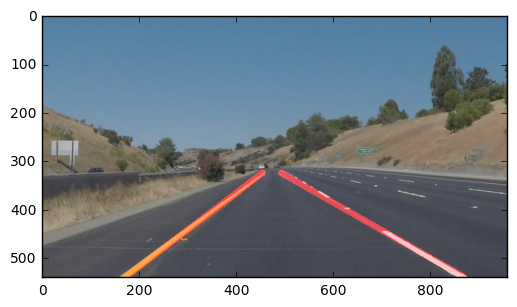

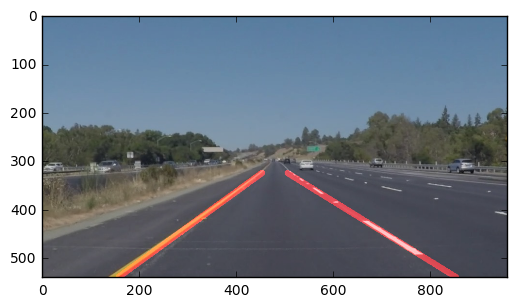

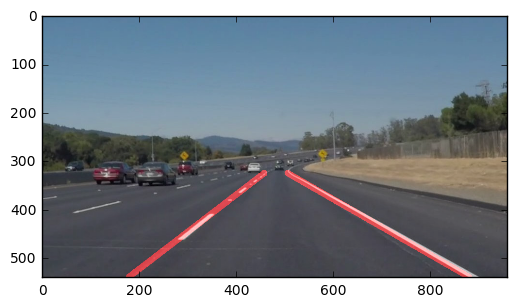

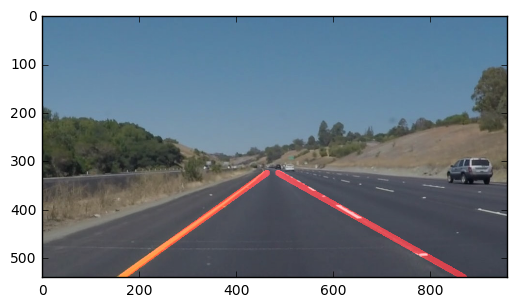

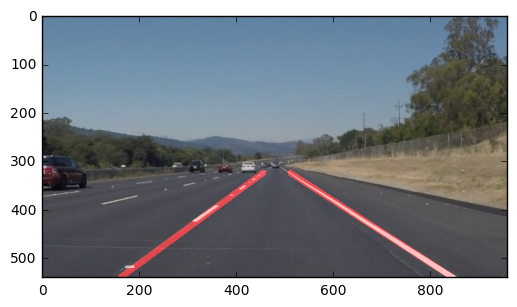

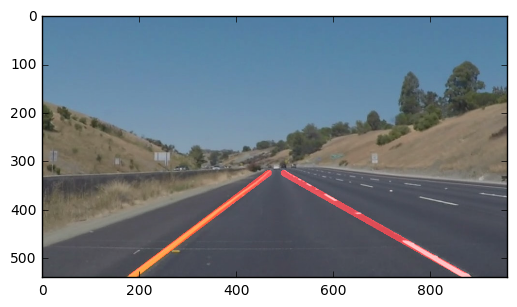

In [5]:
import os
images=os.listdir("test_images/")
process_test_image(images)

## Test on Videos

In [6]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [8]:
def process_image(image):
    gray=grayscale(image)
    blur_gray =gaussian_blur(gray,3)
    edges=canny(blur_gray,75,150)
    masked_edges=region_of_interest(edges,np.array([[(150,540),(450,350),(490,350),(900,540)]]))
    h_img=hough_lines(masked_edges,2,np.pi/180,15,40,20)
    final=weighted_img(h_img,image)
    return final  

In [9]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


100%|█████████▉| 221/222 [00:09<00:00, 24.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 57.6 s, sys: 2.27 s, total: 59.9 s
Wall time: 9.7 s


In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

May be some points or lane parts are not considered at Hough lines so produced NaN/Zero from draw_lines() function which was challenging. 

In [10]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4


  0%|          | 0/682 [00:00<?, ?it/s]

TypeError: 'NoneType' object is not iterable

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Optional Challenge

3. Slope for classification is kept in a range 

and 


4. Average value of x1 and deviation from average. If x1 is below max or above threshold range 
then average value is added to x1 else mean value of x1 added to reduce deviation in draw_lines() function

In [ ]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
def draw_lines(img, lines, color=[150, 0,0], thickness=11):
## Right lane, negative slope
## Left lane, positive slope
    global x1_Pve
    global x2_Pve
    global x1_Nve
    global x2_Nve
    y_min = 0.6018518518518519*img.shape[0]
    y_max = img.shape[0]
    count_Nve=0.
    count_Pve=0.
    sum_x1_Nve =0.
    sum_x2_Nve =0. 
    sum_x1_Pve =0.
    sum_x2_Pve =0.
    for line in lines:
        for x1, y1, x2, y2 in line:
            if x2 != x1:
                m = (y2 - y1)/(x2 - x1)
                x_min=(y_min - y1)/m
                x_max=(y_max - y1)/m
                x_Nve,x_Pve,slope_Nve,slope_Pve= [],[],[],[]
                if -0.8 < m < -0.45:
                    count_Nve += 1
                    slope_Nve.append(m)
                    avg_slope_Nve=np.mean(slope_Nve)
                    x_Nve.append(x1)
                    x_Nve.append(x2)
                    avg_x_Nve=np.mean(x_Nve)
                    if abs(x1)>abs(avg_x_Nve)*0.995 and abs(x1)<abs(avg_x_Nve)*1.005:
                        sum_x1_Nve += x_min + x1
                        sum_x2_Nve += x_max + x1
                    else:
                        sum_x1_Nve += x_min + avg_x_Nve
                        sum_x2_Nve += x_max + avg_x_Nve
                   
                if 0.8 > m > 0.45:
                    count_Pve += 1
                    slope_Pve.append(m)
                    avg_slope_Pve=np.mean(slope_Pve)
                    x_Pve.append(x1)
                    x_Pve.append(x2)
                    avg_x_Pve=np.mean(x_Pve)
                    if abs(x1)>abs(avg_x_Pve)*0.95 and abs(x1)<abs(avg_x_Pve)*0.99:
                        sum_x1_Pve += x_min + x1
                        sum_x2_Pve += x_max + x1
                    else:
                        sum_x1_Pve += x_min + avg_x_Pve
                        sum_x2_Pve += x_max + avg_x_Pve
    if count_Nve != 0:
        x1_Nve = sum_x1_Nve/count_Nve
        x2_Nve = sum_x2_Nve/count_Nve
    cv2.line(img, (int(x1_Nve),int(y_min)), (int(x2_Nve),y_max), color, thickness)
    
    if count_Pve != 0:
        x1_Pve  = sum_x1_Pve/count_Pve
        x2_Pve  = sum_x2_Pve/count_Pve
    cv2.line(img, (int(x1_Pve),int(y_min)), (int(x2_Pve),y_max),  color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

In [ ]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))